<H1> Detection de la pneumonie a travers des images radiologiques: </H1>







<H2> <font color ="red">Introduction Générale: </font> </H2>
<p> Il s’avère que l’intelligence artificielle joue un rôle majeur au sein de notre société grâce au progrès révolutionnaire qu’elle avait connu à l’ère du numérique. Depuis son émergence en 1950, nous avons assisté à une croissance exponentielle de son potentiel. Ainsi, est-elle devenue omniprésente dans plusieurs domaines tels que le transport, le commerce, la finance, la sécurité etc. Elle avait également fait son chemin dans le domaine de la médecine et la radiologie. C’est ainsi que nous nous sommes intéressés à l’IA et plus particulèrement  à son application dans le domaine de l'imagerie médicale. Neanmoins, nous nous limiterons dans ce projet à l'utilisation d'algorithmes de l'apprentissage supervisé. En effet, notre projet consiste à détecter de pneumonie à partir d'une image radiologique fournie en entrée.  

</p>


    

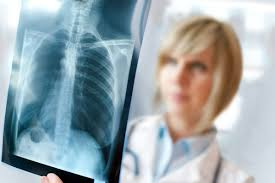

<h2> Problèmatique: </h2>
<p> Bien que plusieurs personnes soinet diagnostiquées d'une pneumonie, l'interpretation radiologique des images des patients reposent seulement sur l'oeil du radiologue ou du médecin.
Tenant en consiédration que l’œil humain est sujet à de nombreux biais cognitifs, la détection de cette maladie peut être exposée à une erreur humaine.
Donc quelle serait la solution permettant d'accélerer ce processus et de réduire le taux des erreurs humaines ? </p>

<h2> Solution :</h2> 
<p> Afin de surmonter ce problème nous avons fait recours à l'utilisation du deep learning et plus particulèrement au CNN. Cette solution consiste à appliquer ce modèle sur un dataset composé des images radiologiques des patients sains et d'autres de patients atteint de pneumonie. Cette détection revient à classifier une image fournie en entrée : image d'un patient sain ou celle d'un patient atteint de pneumonie   </p> 


<h2> Qu'est ce que le deep learning ? </h2>
<p> C' est un type d'intelligence artificielle dérivé du  Machine Learning qui repose sur l’utilisation des réseaux neuronaux artificiels permettant ainsi aux systèmes numériques de comprendre des données non structurées .</p>

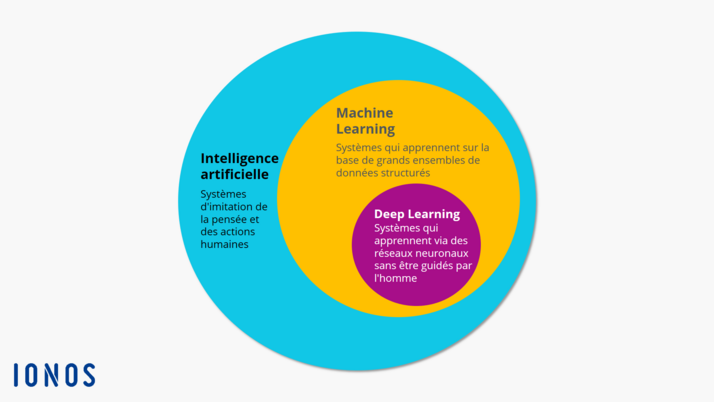

<h2> Qu'est ce qu'un réseau de neurones ? </h2>
<p>  Un réseau de neurones artificiels ou ANN, est un système informatique matériel et / ou logiciel dont le fonctionnement est calqué sur celui des neurones du cerveau humain.
Il existe plusieurs types de ANN tels que 
 Le CNN et le RNN.
</p>

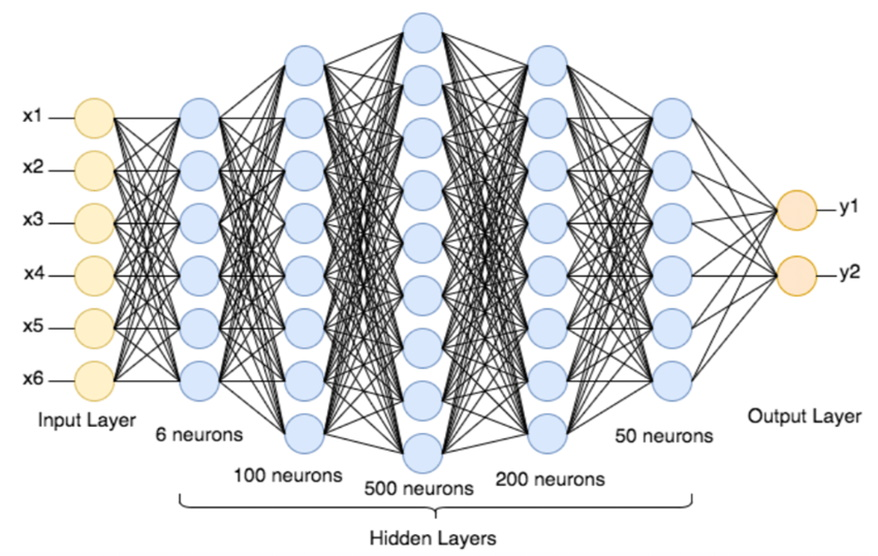

<h2> Le CNN </h2>

 Le réseau de neurones convolutif désigne une sous-catégorie de réseaux de neurones.Cependant, le CNN est spécialement conçu pour traiter des images en entrée.
 Son architecture dispose en amont d’une partie convolutive et comporte par conséquentdeux parties: Unepartie convolutiveet une partie de classification.

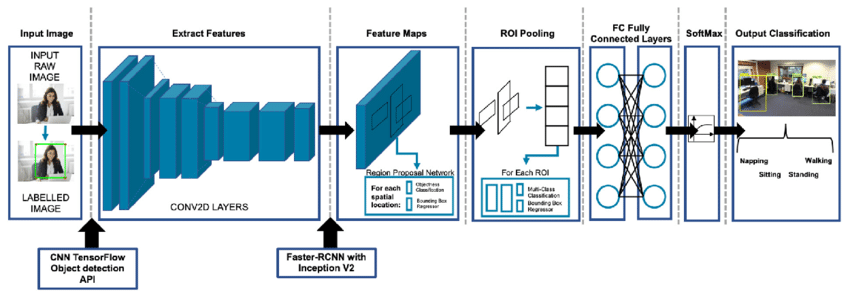


<h2> Importation des packages et du dataset:</h2>

In [56]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [57]:


IMG_SIZE = 224
BATCH = 32
SEED = 42



<h2> Chargement des données:</h2>

In [58]:
#main_path = "../input/chest-xray-pneumonia/chest_xray/"
main_path = "/home/user/Bureau/XRAY/chest_xray"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")


In [59]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

<h2> Visualisation des données </h2>

In [60]:
df_train

,class,image
0,Normal,/home/user/Bureau/XRAY/chest_xray/train/NORMAL/IM-0643-0001.jpeg
1,Normal,/home/user/Bureau/XRAY/chest_xray/train/NORMAL/NORMAL2-IM-1179-0001.jpeg
2,Normal,/home/user/Bureau/XRAY/chest_xray/train/NORMAL/IM-0629-0001-0002.jpeg
3,Normal,/home/user/Bureau/XRAY/chest_xray/train/NORMAL/IM-0496-0001.jpeg
4,Normal,/home/user/Bureau/XRAY/chest_xray/train/NORMAL/NORMAL2-IM-0594-0001.jpeg
...,...,...
5211,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person586_virus_1130.jpeg
5212,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person713_bacteria_2614.jpeg
5213,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person1389_virus_2387.jpeg
5214,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person1009_virus_1694.jpeg


In [61]:
df_test

,class,image
0,Normal,/home/user/Bureau/XRAY/chest_xray/test/NORMAL/IM-0033-0001-0002.jpeg
1,Normal,/home/user/Bureau/XRAY/chest_xray/test/NORMAL/NORMAL2-IM-0213-0001.jpeg
2,Normal,/home/user/Bureau/XRAY/chest_xray/test/NORMAL/NORMAL2-IM-0123-0001.jpeg
3,Normal,/home/user/Bureau/XRAY/chest_xray/test/NORMAL/IM-0022-0001.jpeg
4,Normal,/home/user/Bureau/XRAY/chest_xray/test/NORMAL/NORMAL2-IM-0354-0001.jpeg
...,...,...
619,Pneumonia,/home/user/Bureau/XRAY/chest_xray/test/PNEUMONIA/person159_bacteria_747.jpeg
620,Pneumonia,/home/user/Bureau/XRAY/chest_xray/test/PNEUMONIA/person1614_virus_2800.jpeg
621,Pneumonia,/home/user/Bureau/XRAY/chest_xray/test/PNEUMONIA/person133_bacteria_633.jpeg
622,Pneumonia,/home/user/Bureau/XRAY/chest_xray/test/PNEUMONIA/person1675_virus_2891.jpeg


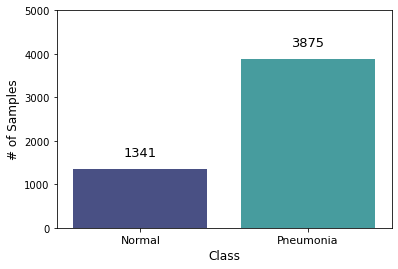

In [62]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()



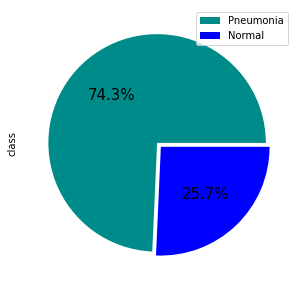

In [63]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

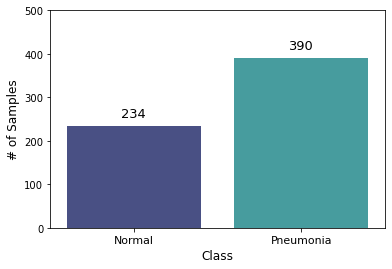

In [64]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)
    
plt.show()

<h2> Quelques images du dataset d'entrainement d'un patient sain </h2>

Train Set - Normal


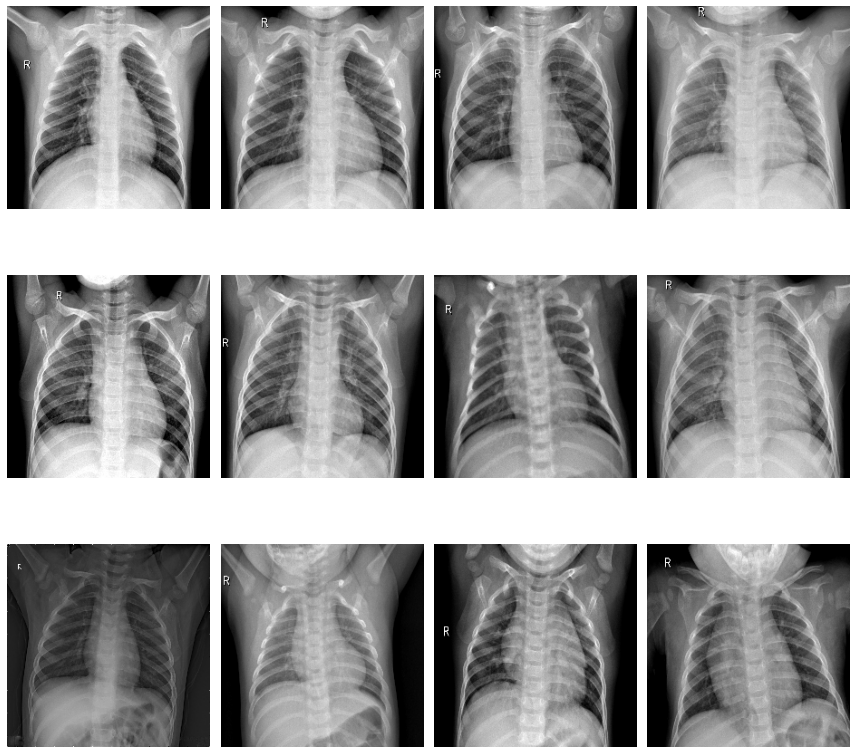

In [65]:


print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()



<h2> Quelques images du dataset d'entrainement d'un patient atteint de pneumonie </h2>

Train Set - Pneumonia


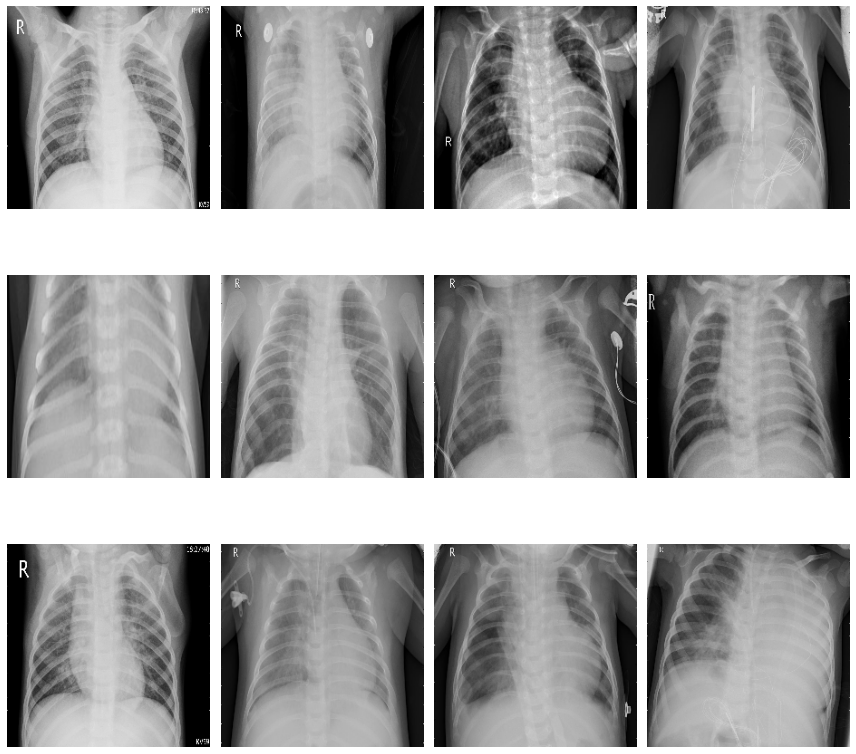

In [66]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()



<h2> Quelques images du dataset de test d'un patient sain </h2>

Test Set - Normal


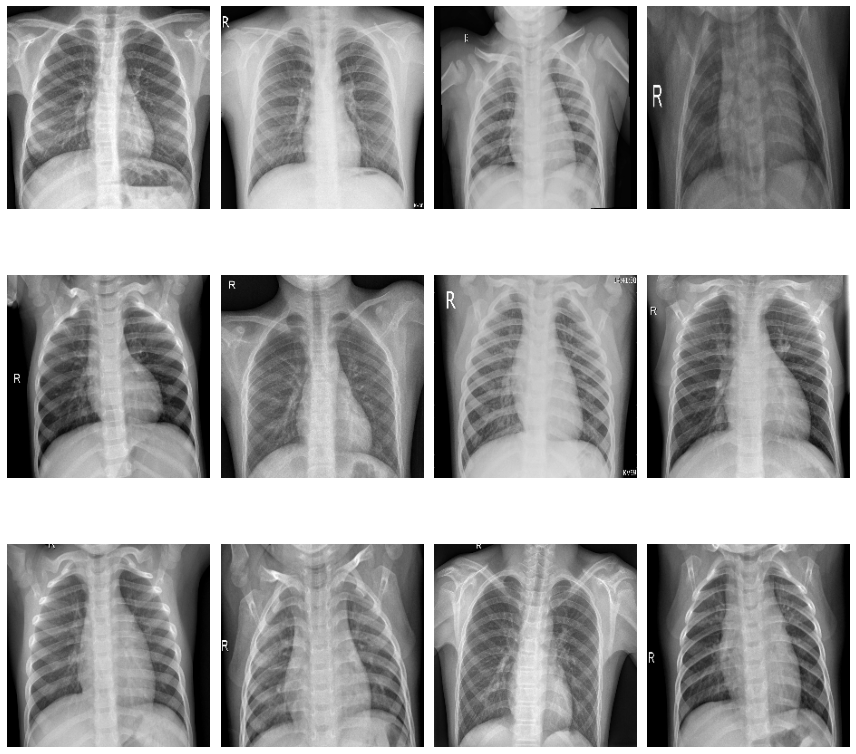

In [67]:


print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()



<h2> Quelques images du dataset de test d'un patient atteint de pneumonie </h2>

Test Set - Pneumonia


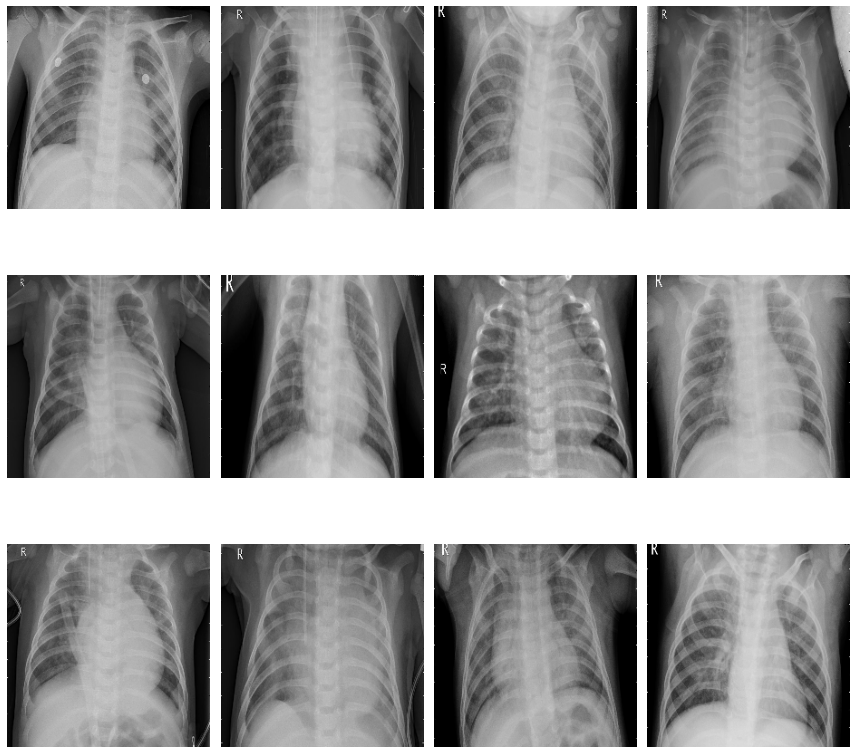

In [68]:


print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()



In [69]:


train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])



In [70]:
train_df

,class,image
99,Normal,/home/user/Bureau/XRAY/chest_xray/train/NORMAL/NORMAL2-IM-1116-0001.jpeg
1284,Normal,/home/user/Bureau/XRAY/chest_xray/train/NORMAL/IM-0569-0001.jpeg
5142,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person294_virus_611.jpeg
1365,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person140_virus_285.jpeg
2649,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person864_virus_1509.jpeg
...,...,...
4481,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person517_bacteria_2196.jpeg
2404,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person585_bacteria_2416.jpeg
705,Normal,/home/user/Bureau/XRAY/chest_xray/train/NORMAL/IM-0702-0001.jpeg
3732,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person1651_bacteria_4381.jpeg


In [71]:
val_df


,class,image
1977,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person1542_bacteria_4029.jpeg
2328,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person31_bacteria_162.jpeg
4344,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person940_bacteria_2865.jpeg
956,Normal,/home/user/Bureau/XRAY/chest_xray/train/NORMAL/IM-0595-0001.jpeg
3753,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person1777_bacteria_4622.jpeg
...,...,...
3339,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person1135_bacteria_3077.jpeg
1368,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person1469_bacteria_3827.jpeg
1585,Pneumonia,/home/user/Bureau/XRAY/chest_xray/train/PNEUMONIA/person1670_bacteria_4425.jpeg
1128,Normal,/home/user/Bureau/XRAY/chest_xray/train/NORMAL/IM-0578-0001.jpeg


In [72]:
# https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c

train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


<h2> définition des callbakcs : </h2>

In [73]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 


<h2> Définition de l'architecture du modèle </h2>

In [74]:
def get_model():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

<h2> visualisation des couches du modèle </h2>

In [75]:


keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

<h2>  Entrainement </h2>

In [76]:


history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));



Epoch 1/50
130/130 [==============================] - 67s 505ms/step - loss: 0.4476 - binary_accuracy: 0.8044 - val_loss: 1.1164 - val_binary_accuracy: 0.7433 - lr: 3.0000e-05
Epoch 2/50
130/130 [==============================] - 67s 510ms/step - loss: 0.2971 - binary_accuracy: 0.8718 - val_loss: 1.7988 - val_binary_accuracy: 0.7433 - lr: 3.0000e-05
Epoch 3/50
131/130 [==============================] - ETA: 0s - loss: 0.2561 - binary_accuracy: 0.8900
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 73s 562ms/step - loss: 0.2561 - binary_accuracy: 0.8900 - val_loss: 1.7989 - val_binary_accuracy: 0.7433 - lr: 3.0000e-05
Epoch 4/50
130/130 [==============================] - 78s 599ms/step - loss: 0.2275 - binary_accuracy: 0.9065 - val_loss: 1.0004 - val_binary_accuracy: 0.7433 - lr: 6.0000e-06
Epoch 5/50
130/130 [==============================] - 76s 579ms/step - loss: 0.2120 - binary_accuracy: 0.9195 - val_loss: 0.252

<h2> visualisation de l'evolution du "Learning Loss" au cours de l'apprentissage </h2>

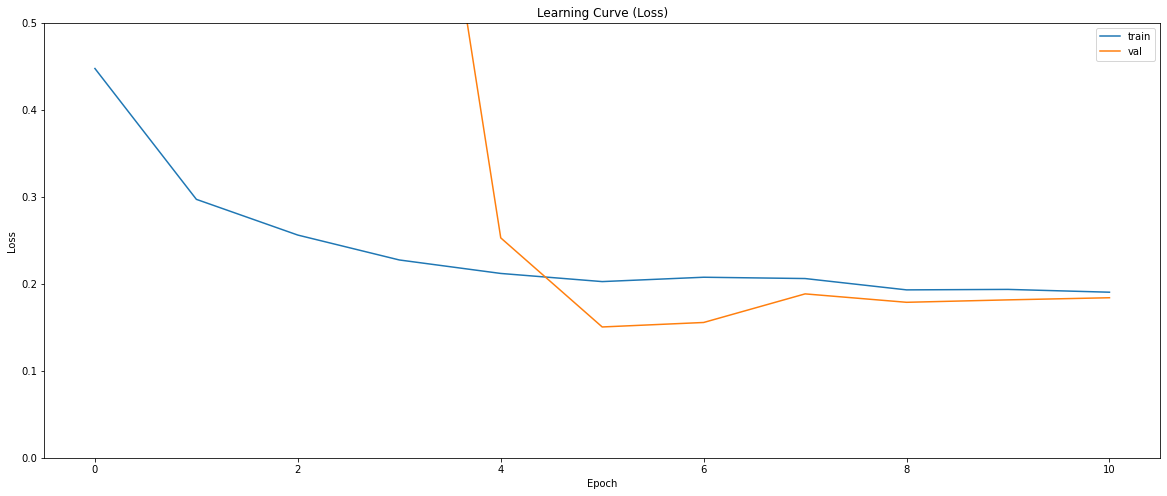

In [77]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

<h2> visualisation de l'evolution du "Learning accuracy" au cours de l'apprentissage </h2>

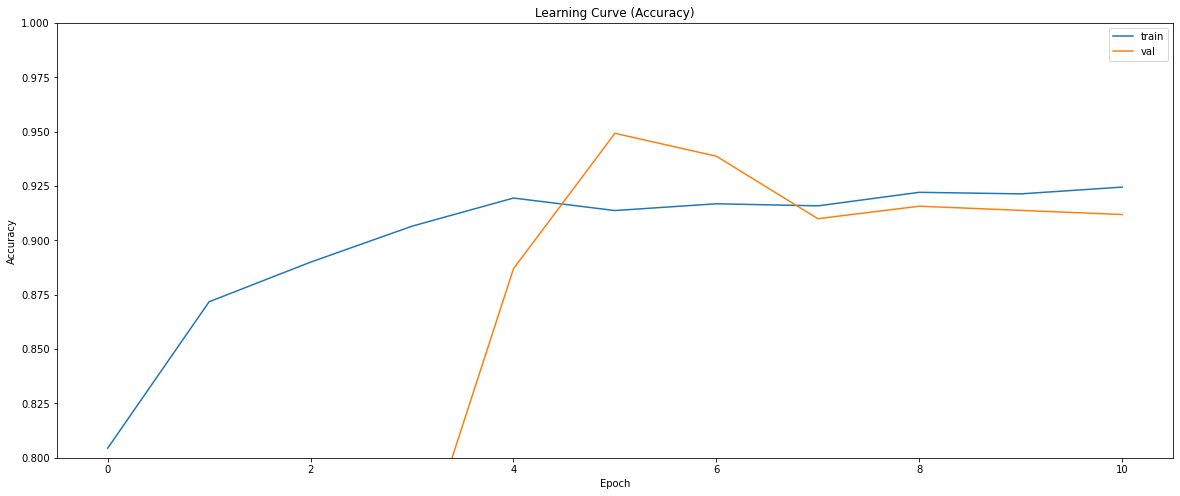

In [78]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [79]:


score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])



Val loss: 0.1504310816526413
Val accuracy: 0.9492337107658386


In [80]:


score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.49917343258857727
Test accuracy: 0.8092948794364929


<h2> Transfer Learning</h2>

In [81]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

234545216/234545216 [==============================] - 211s 1us/step


<h2> Détails sur les couches de ce modèle </h2>

In [82]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

<h2> Entrainement </h2>

In [83]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
130/130 [==============================] - 366s 3s/step - loss: 0.3623 - binary_accuracy: 0.8372 - val_loss: 0.1977 - val_binary_accuracy: 0.9301 - lr: 5.0000e-05
Epoch 2/50
130/130 [==============================] - 375s 3s/step - loss: 0.2014 - binary_accuracy: 0.9235 - val_loss: 0.1522 - val_binary_accuracy: 0.9416 - lr: 5.0000e-05
Epoch 3/50
130/130 [==============================] - 374s 3s/step - loss: 0.1739 - binary_accuracy: 0.9346 - val_loss: 0.1320 - val_binary_accuracy: 0.9502 - lr: 5.0000e-05
Epoch 4/50
130/130 [==============================] - 374s 3s/step - loss: 0.1521 - binary_accuracy: 0.9444 - val_loss: 0.1182 - val_binary_accuracy: 0.9559 - lr: 5.0000e-05
Epoch 5/50
130/130 [==============================] - 374s 3s/step - loss: 0.1387 - binary_accuracy: 0.9489 - val_loss: 0.1099 - val_binary_accuracy: 0.9588 - lr: 5.0000e-05
Epoch 6/50
130/130 [==============================] - 375s 3s/step - loss: 0.1312 - binary_accuracy: 0.9504 - val_loss: 0.1051 - v

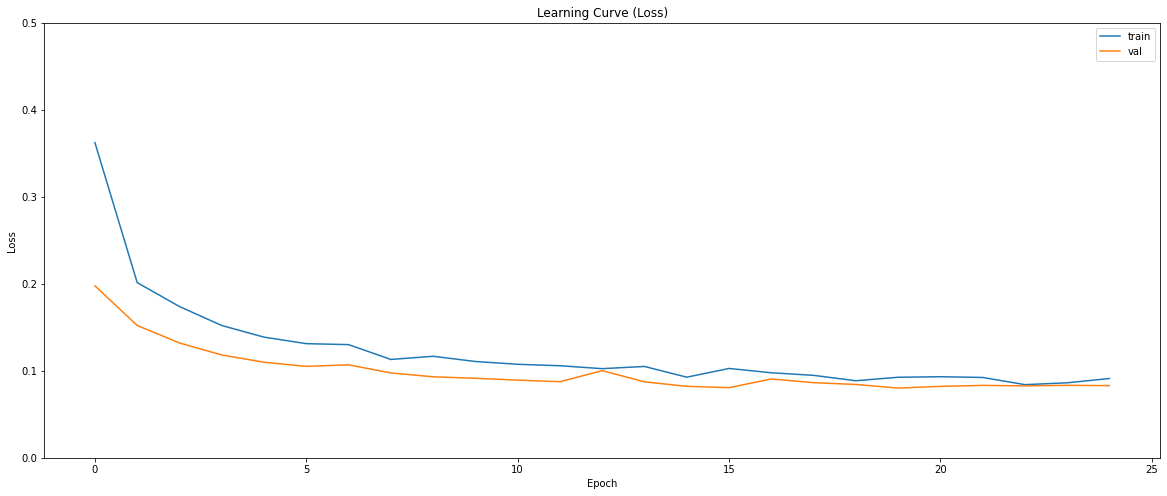

In [84]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

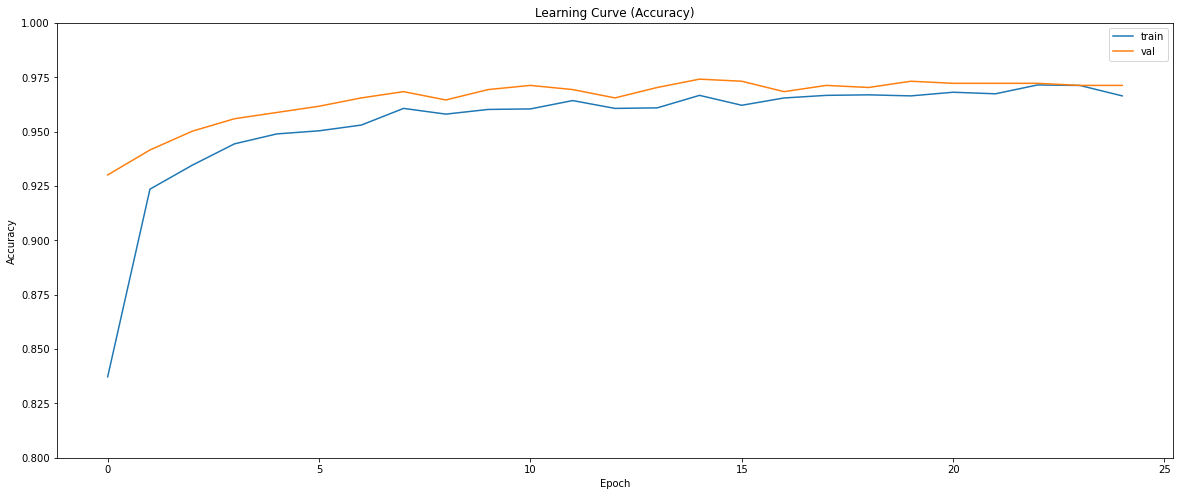

In [85]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [86]:


score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])



Val loss: 0.08018676936626434
Val accuracy: 0.9731800556182861


In [87]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4274890720844269
Test accuracy: 0.8541666865348816


In [90]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [91]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [93]:


history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 10,
          validation_data=ds_val,
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));



Epoch 1/10
130/130 [==============================] - 380s 3s/step - loss: 0.0928 - binary_accuracy: 0.9669 - val_loss: 0.0807 - val_binary_accuracy: 0.9732
Epoch 2/10
130/130 [==============================] - 387s 3s/step - loss: 0.0889 - binary_accuracy: 0.9676 - val_loss: 0.0809 - val_binary_accuracy: 0.9732
Epoch 3/10
130/130 [==============================] - 390s 3s/step - loss: 0.0890 - binary_accuracy: 0.9676 - val_loss: 0.0811 - val_binary_accuracy: 0.9732
Epoch 4/10
130/130 [==============================] - 382s 3s/step - loss: 0.0866 - binary_accuracy: 0.9693 - val_loss: 0.0815 - val_binary_accuracy: 0.9732
Epoch 5/10
130/130 [==============================] - 381s 3s/step - loss: 0.0811 - binary_accuracy: 0.9717 - val_loss: 0.0817 - val_binary_accuracy: 0.9732
Epoch 6/10
130/130 [==============================] - 377s 3s/step - loss: 0.0879 - binary_accuracy: 0.9667 - val_loss: 0.0822 - val_binary_accuracy: 0.9722
Epoch 7/10
130/130 [==============================] - 374s

<h2> visualisation de l'evolution du "Learning Loss" au cours de l'apprentissage </h2>


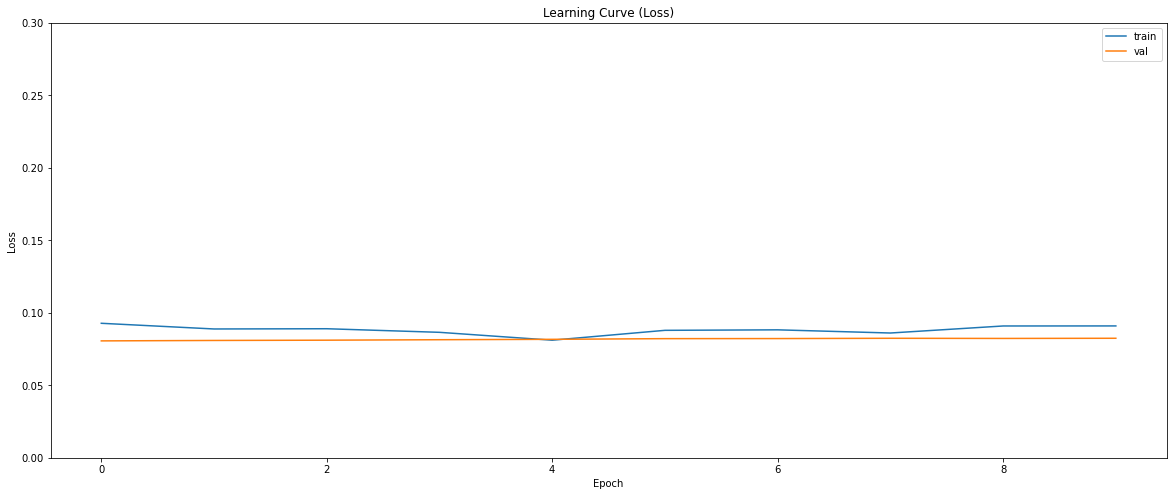

In [94]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.3)
ax.legend(['train', 'val'], loc='best')
plt.show()

<h2> visualisation de l'evolution du "Learning Accuracy" au cours de l'apprentissage </h2>

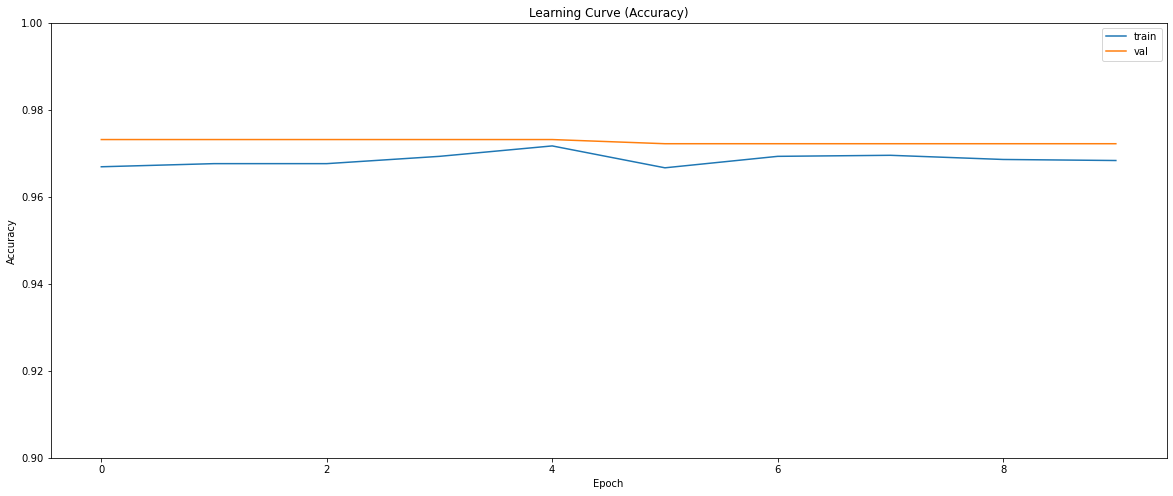

In [98]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.90, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [95]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.08245638012886047
Val accuracy: 0.9722222089767456


<h2> Test de précision </h2>

In [99]:


num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')



In [100]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)


In [101]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.8637820512820513


<h2> Matrice de confusion </h2>

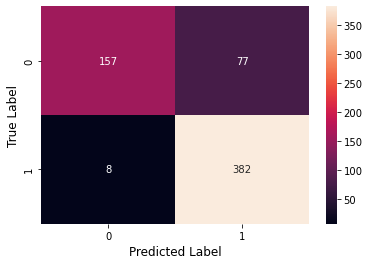

In [102]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [103]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.67      0.79       234
           1       0.83      0.98      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.83      0.84       624
weighted avg       0.88      0.86      0.86       624



<h2> Evolution du degré de la précision au cours de l'entrainement </h2>

ROC_AUC:  0.9491562568485645


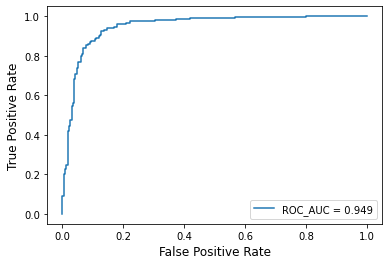

In [104]:
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()